In [1]:
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
! ls

Athos_example_cut.png
Athos_example_spectrum.png
DAQ_tools.py
Image_grab.ipynb
Image_grab_PMOS.ipynb
Plot_from_pipeline_h5.ipynb
Plot_img_PMOS.ipynb
Plot_img_PMOS_tilt.ipynb
PSCR066.png
SAROP21-PPRM102FE.h5
SAROP21-PPRM102switch.h5
SATFE10-PSCR0666.h5
SATOP31-PMOS132-2D6.h5
SATOP31-PMOS132-2Dlarge_tilt2.h5
SATOP31-PMOS132-2Dlarge_tilt.h5
SATOP31-PMOS132-2Dless_less_tilt.h5
SATOP31-PMOS132-2Dless_tilt.h5
SATOP31-PMOS132-2Dno_tilt.h5
SATOP31-PMOS132-2Dstandard_SASE.h5
SATOP31-PMOS132-2Dverylarge_tilt2.h5
SATOP31-PMOS132-2Dverylarge_tilt_first5chic.h5
SATOP31-PMOS132-2Dverylarge_tilt_first5chicOpenUnd.h5
SATOP31-PMOS132-2Dverylarge_tilt.h5
SATOP31-PMOS132-2Dverylarge_tilt_narrow_BW2.h5
SATOP31-PMOS132-2Dverylarge_tilt_narrow_BW.h5
SATOP31-PMOS132-2Dverylarge_tilt_narrow_last_set.h5
Save_from_pipeline.ipynb
Scan_with_pipeline.ipynb
VeryLargeTilt.png


In [17]:
fn = 'SATOP31-PMOS132-2Dno_tilt.h5'

In [18]:
with h5.File(fn,'r') as fh:
    Img_mean = fh['mean'][:]
    Img = fh['images'][:]
    Camera_name = fh['Camera name']
    e_axis = fh['e_axis'][:]
    print(list(fh.keys()))

['Camera name', 'Height', 'Width', 'e_axis', 'images', 'mean']


In [19]:
sns.set_style(style="darkgrid")
sns.set_context(context="talk")
vert = np.arange(0,Img.shape[1])

def find_index(x,val):
    return np.argmin(np.abs(x-val))

In [20]:
e_axis[336]

532.0007639956093

IndexError: index 22 is out of bounds for axis 0 with size 20

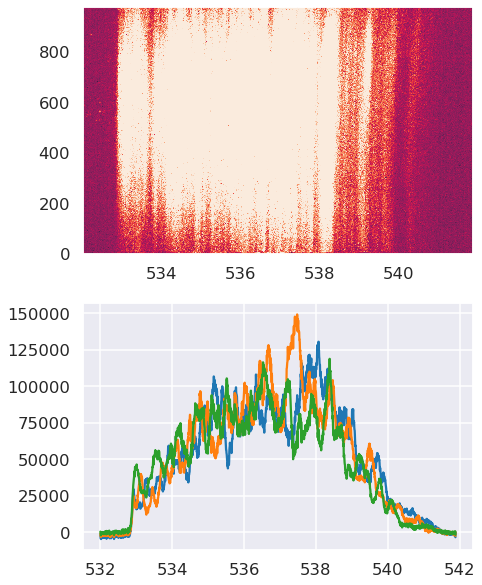

In [21]:
ind =11
e_crop_1 = find_index(e_axis,532)
# bkg_cut = Img[ind,700:900,:].sum(axis=0)
# bkg_all = Img[ind,700:1300,:].sum(axis=0)


# cut_1 = Img[ind,0:200,:].sum(axis=0)-bkg_cut
# cut_2 = Img[ind,200:400,:].sum(axis=0)-bkg_cut
# cut_3 = Img[ind,400:600,:].sum(axis=0)-bkg_cut
# cut_0 = Img[ind,0:600,:].sum(axis=0)-bkg_all
plt.figure(figsize=[7,10])
plt.subplot(211)
val = 980
plt.pcolormesh(e_axis[e_crop_1:-1],vert[0:val],Img[ind,0:val,e_crop_1:-1], vmax = 150)
# plt.colorbar()
# plt.pcolormesh(e_axis,vert,Img[ind,0:500,:], clim = 10)

# plt.hlines(2,e_axis[0], e_axis[-1], colors="tab:red")
# plt.hlines(200,e_axis[0], e_axis[-1], colors="tab:red")
# plt.hlines(400,e_axis[0], e_axis[-1], colors="tab:blue")
# plt.hlines(600,e_axis[0], e_axis[-1], colors="tab:blue")

plt.subplot(212)
for i in [2, 8 ,12, 22,39]:
#     plt.plot(e_axis[e_crop_1:-1], Img[i,:,e_crop_1:].sum(axis=0), color = "tab:red", label=i)
    plt.plot(e_axis[e_crop_1:-1], Img[i,:,e_crop_1:].sum(axis=0)-Img[i,:,-100:].sum(axis=0).mean(axis=0), label=i)
# 2, 8 ,12, 22,39
# plt.plot(e_axis, cut_3/np.max(cut_3), color = "tab:blue", label='Upper cut')
# plt.xlabel('Energy [eV]')
plt.legend()
# plt.tight_layout()
# plt.savefig('Athos_example_cut', dpi =300)

In [8]:
for num, val in enumerate([2, 8 ,12, 22,39]):
    print(val)

2
8
12
22
39


IndexError: index 39 is out of bounds for axis 0 with size 20

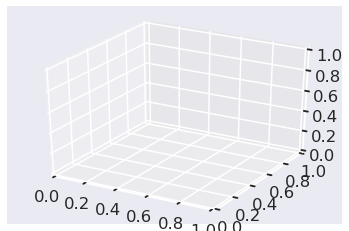

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
# for num, i in enumerate([2, 8 ,12, 22,39]):
for num, i in enumerate([39, 22 ,12, 8,2]):
    
    ax.plot(e_axis[e_crop_1:-1], Img[i,:,e_crop_1:].sum(axis=0)-Img[i,:,-100:].sum(axis=0).mean(axis=0),num, zdir='y')
ax.set_yticks([])
ax.view_init(elev=50, azim=-30)
ax.set_xlabel('Energy [eV]')
plt.tight_layout()
# plt.savefig('VeryLargeTilt')
#     ax.plot(e_axis[e_crop_1:-1],num, Img[i,:,e_crop_1:].sum(axis=0)-Img[i,:,-100:].sum(axis=0).mean(axis=0), label=i)

In [ ]:
spec.

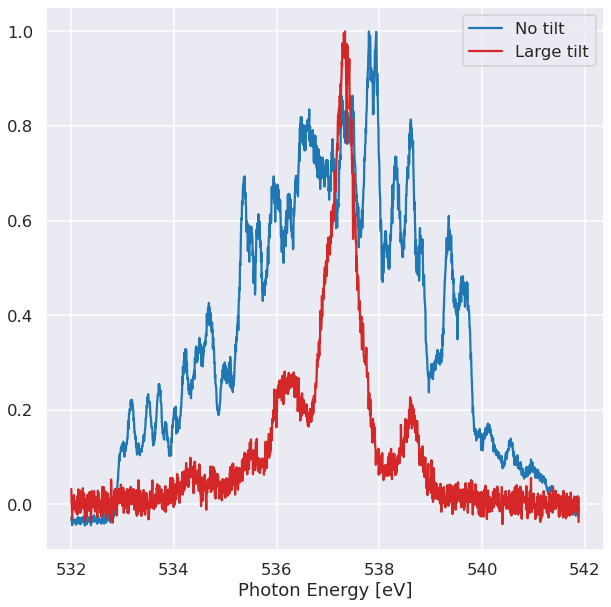

In [28]:
i = 15
spec = Img[i,:,e_crop_1:].sum(axis=0)-Img[i,:,-100:].sum(axis=0).mean(axis=0)
spec2 = spec/np.max(spec)
# spec1 = spec/np.max(spec)
# e_axis1 = e_axis[e_crop_1:-1]
e_axis2 = e_axis[e_crop_1:-1]

plt.figure(figsize=[10,10])
plt.plot(e_axis2, spec2,label = 'No tilt', color = 'tab:blue')

plt.plot(e_axis1, spec1,label = 'Large tilt', color = 'tab:red')

plt.xlabel('Photon Energy [eV]')
plt.legend()

In [53]:
Img[ind,:,e_crop_1:].sum(axis=0).shape

(1760,)

ValueError: x and y must have same first dimension, but have shapes (2097,) and (2096,)

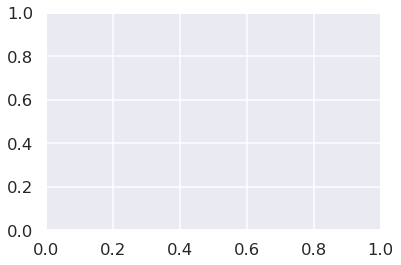

In [8]:
ind =0
bkg_cut = Img[ind,700:900,:].sum(axis=0)
bkg_all = Img[ind,700:1300,:].sum(axis=0)


cut_1 = Img[ind,0:200,:].sum(axis=0)-bkg_cut
cut_2 = Img[ind,200:400,:].sum(axis=0)-bkg_cut
cut_3 = Img[ind,400:600,:].sum(axis=0)-bkg_cut
cut_0 = Img[ind,0:600,:].sum(axis=0)-bkg_all
plt.figure()
plt.plot(e_axis, cut_1/np.max(cut_1), color = "tab:red", label='Lower cut')
plt.xlabel('Energy [eV]')
plt.ylabel('Counts [arb]')
plt.tight_layout()
# plt.savefig('Athos_example_spectrum', dpi =300)